<b>Importing Python Packages</b>

In [51]:
import sklearn  # for applyling  maching leraning algorithms
import matplotlib.pyplot as plt # for plotting
%matplotlib inline         
import pandas        # for data handling
from sklearn.model_selection import train_test_split
import numpy as np        # for numerical methods and data structures

<b>Importing the data</b>

In [52]:
Twitter_Tweet = pandas.read_csv("C:/Users/CSUFTitan/Downloads/Tweets.csv")

<b>Data Exploration</b>

In [53]:
Twitter_Tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.1+ MB


<b> Total number of records and columns </b>

In [54]:
Twitter_Tweet.shape

(14640, 15)

<b>Glimpse of Data</b>

In [55]:
Twitter_Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<b>Checking for inconsistent Datatypes</b>

In [56]:
Twitter_Tweet.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

<b> Data cleaning - Deleting specific Tweets which are not of our interest <b>

In [57]:
del Twitter_Tweet['tweet_coord']
del Twitter_Tweet['airline_sentiment_gold']
del Twitter_Tweet['negativereason_gold']

<b> Glimpse of Data</b>

In [58]:
Twitter_Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<b> Calculating  airline_sentiment Tweet Count </b>

In [59]:
TotalMood_count=Twitter_Tweet['airline_sentiment'].value_counts()

<b>How the Tweets distributed in the data?</b>

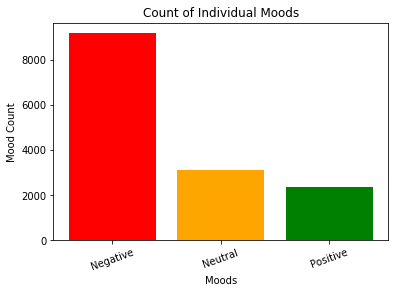

<Figure size 432x720 with 0 Axes>

In [60]:
Index = [1,2,3]
plt.bar(Index,TotalMood_count,color=['Red', 'Orange', 'Green'])
plt.xticks(Index,['Negative','Neutral','Positive'],rotation=20)
plt.ylabel('Mood Count')
plt.xlabel('Moods')
plt.title('Count of Individual Moods')
plt.figure(0.5,figsize=(6,10))
plt.show()

<b> Total Individual airline Tweet count  </b>

In [61]:
Individual_Airline_count= Twitter_Tweet['airline'].value_counts()
Individual_Airline_count

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

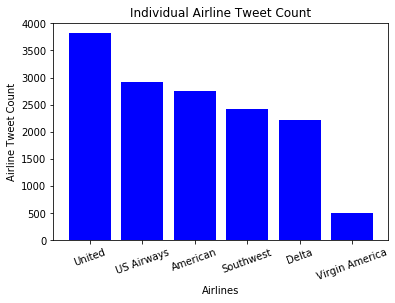

In [62]:
Index = [1,2,3,4,5,6]
plt.bar(Index,Individual_Airline_count,color=['blue'])
plt.xticks(Index,['United','US Airways','American','Southwest','Delta','Virgin America'],rotation=20)
plt.ylabel('Airline Tweet Count')
plt.xlabel('Airlines')
plt.title('Individual Airline Tweet Count')
plt.show()

<b> Individual Airline Mood Graphs </b>

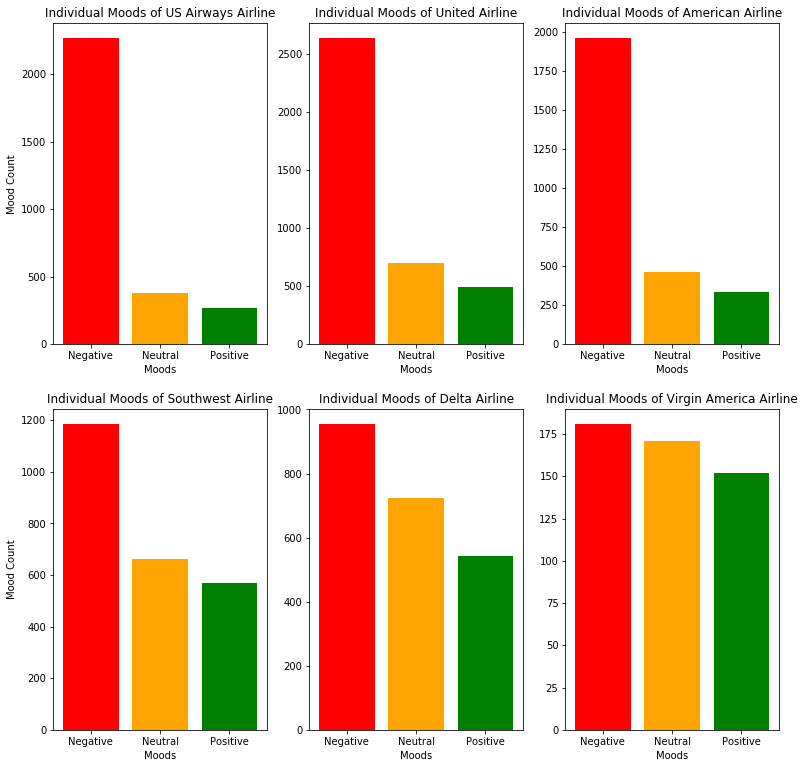

In [63]:
def plot_airline_sentiment(Airline):
    dataFrame=Twitter_Tweet[Twitter_Tweet['airline']==Airline]
    TotalCount=dataFrame['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,TotalCount,color=['Red', 'Orange', 'Green'])
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.xlabel('Moods')
    plt.title('Individual Moods of '+Airline+' Airline')
plt.figure(1,figsize=(13,13))
plt.subplot(231)
plot_airline_sentiment('US Airways')
plt.ylabel('Mood Count')
plt.subplot(232)
plot_airline_sentiment('United')
plt.subplot(233)
plot_airline_sentiment('American')
plt.subplot(234)
plot_airline_sentiment('Southwest')
plt.ylabel('Mood Count')
plt.subplot(235)
plot_airline_sentiment('Delta')
plt.subplot(236)
plot_airline_sentiment('Virgin America')

<b>From the above plots one can find that the distribution of moods for the first
three airlines are always skewed toward negative moods. On contrary, 
the moods are distributed more balanced with the later three airline companies.</b>

In [64]:
Negative_Tweets=dict(Twitter_Tweet['negativereason'].value_counts(sort=False))

<b> Calculating all reasons for negative Tweets  <b>

In [65]:
def Negative_Tweets(Airline):
    if Airline=='All':
        dataFrame=Twitter_Tweet
    else:
        dataFrame=Twitter_Tweet[Twitter_Tweet['airline']==Airline]
    Total_count=dict(dataFrame['negativereason'].value_counts())
    Negative_reason=list(Twitter_Tweet['negativereason'].unique())
    Negative_reason=[x for x in Negative_reason if str(x) != 'nan']
    dframe_Reasons=pandas.DataFrame({'Reasons':Negative_reason})
    
    dframe_Reasons['Total_count']=dframe_Reasons['Reasons'].apply(lambda x: Total_count[x])
    return dframe_Reasons

In [66]:
def Airline_Plot(Airline):
    dataFrame=Negative_Tweets(Airline)
    Total_count=dataFrame['Total_count']
    Index = range(1,(len(dataFrame)+1))
    plt.bar(Index,Total_count,color =['blue'])
    plt.xticks(Index,dataFrame['Reasons'],rotation=90)
    plt.ylabel(' Total Count')
    plt.xlabel('Negative Reasons')
    

<b> Graph Showing reasons for all airlines negative Tweets </b>

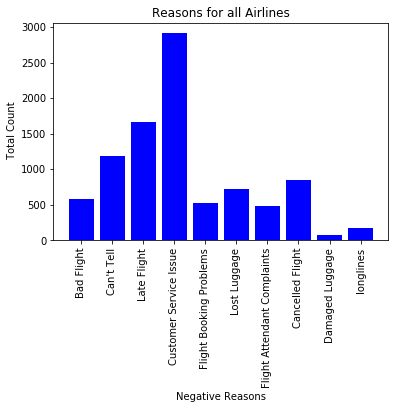

In [67]:
plt.title('Reasons for all Airlines')
Airline_Plot('All')

<b> Graph Showing reasons for US Airways negative Tweets </b>

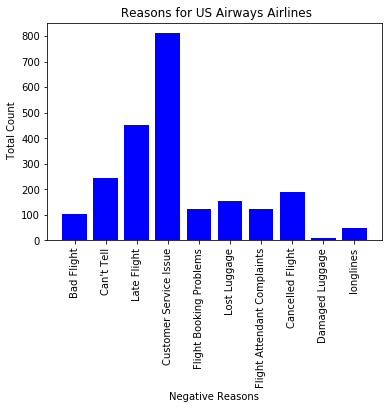

In [68]:
plt.title(' Reasons for US Airways Airlines')
Airline_Plot('US Airways')


<b> Graph Showing reasons for United Airways negative Tweets </b>

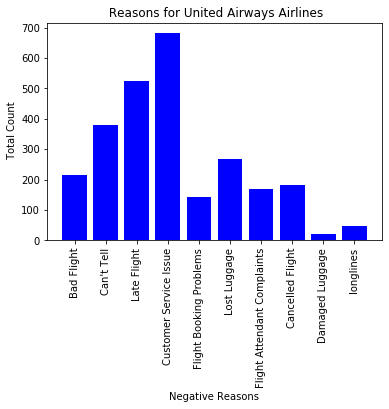

In [69]:
plt.title(' Reasons for United Airways Airlines')
Airline_Plot('United')

<b> Graph Showing reasons for American Airways negative Tweets </b>

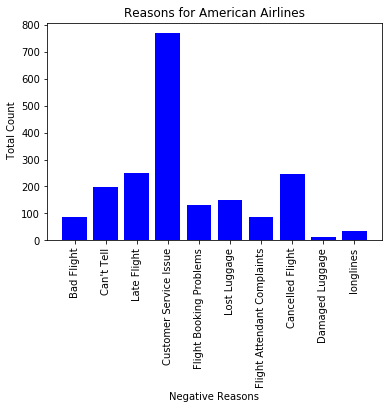

In [70]:
plt.title('Reasons for American Airlines')
Airline_Plot('American')

<b> Graph Showing reasons for Southwest Airways negative Tweets </b>

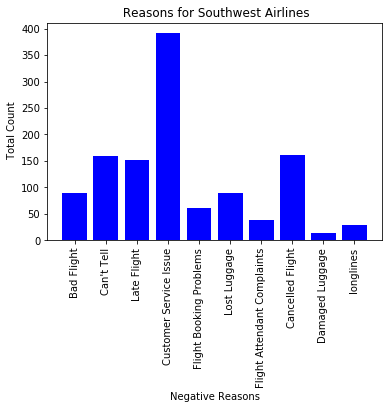

In [71]:
plt.title(' Reasons for Southwest Airlines')
Airline_Plot('Southwest')

<b> Graph Showing reasons for Delta Airways negative Tweets </b>

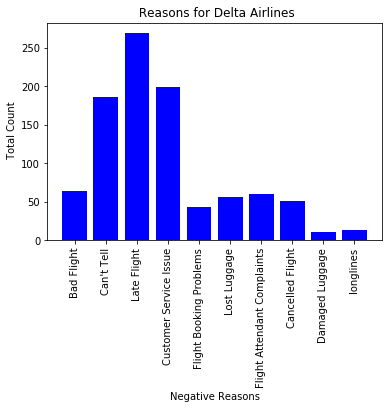

In [72]:
plt.title(' Reasons for Delta Airlines')
Airline_Plot('Delta')

<b> Graph Showing reasons for Virgin America Airways negative Tweets </b>

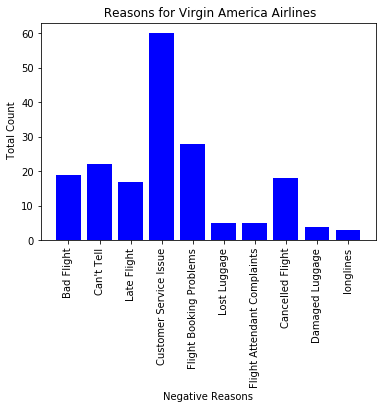

In [73]:
plt.title(' Reasons for Virgin America Airlines')
Airline_Plot('Virgin America')

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
dataFrame=Twitter_Tweet[Twitter_Tweet['airline_sentiment']=='negative']
words = ' '.join(dataFrame['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

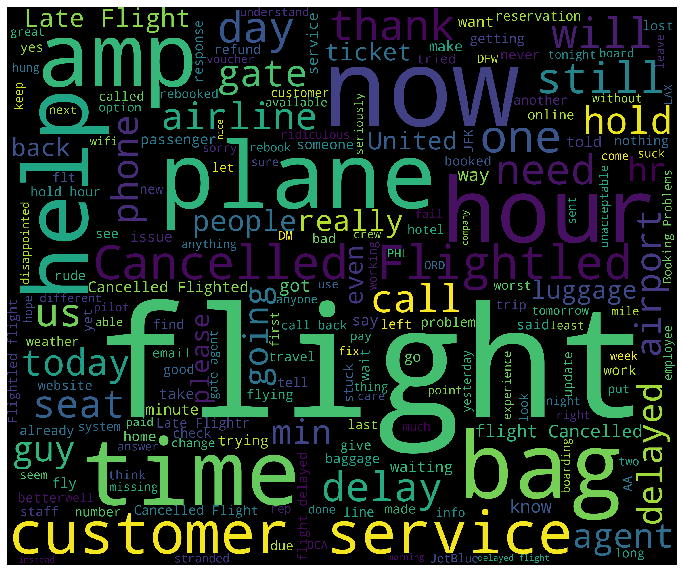

In [26]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with negative moods are frequently involved some words
like cancelled, flight ,customer or hour. People might guess that customer tends to complain 
when they are waiting for the delayed flights.

In [74]:
import numpy as np 
import pandas as pd 
import re    # regular expressions
import nltk  # natural language Toolkit
import matplotlib.pyplot as plt
%matplotlib inline

 Graph showing % of


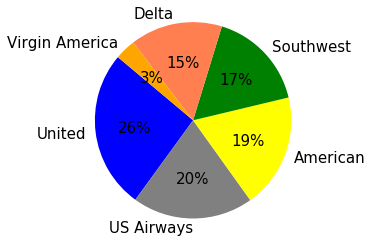

<Figure size 1152x432 with 0 Axes>

In [75]:
labels = 'United', 'US Airways','American','Southwest', 'Delta','Virgin America'
sizes = [3822, 2913, 2759, 2420,2222,504]
colors = ['blue','grey', 'yellow','green', 'coral', 'orange']
explode = (0, 0, 0, 0,0,0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.0f%%', startangle=140,textprops={'fontsize': 15})
plt.axis('equal')
plt.figure(figsize=(16,6))
print(" Graph showing % of")
plt.show()

In the output, you can see the percentage of public tweets for each airline.
United Airline has the highest number of tweets i.e. 26%, followed by US Airways (20%).

In [76]:
Twitter_Tweet.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

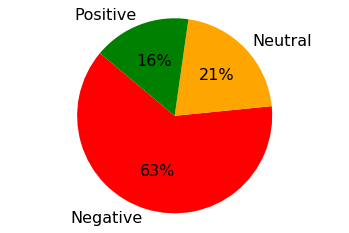

<Figure size 1152x432 with 0 Axes>

In [77]:
labels = 'Negative', 'Neutral','Positive'
sizes = [9178, 3099, 2363]
colors = ['red','orange', 'green']
explode = (0, 0, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.0f%%', startangle=140,textprops={'fontsize': 16})
plt.axis('equal')
plt.figure(figsize=(16,6))
plt.show()

Distribution of sentiment for tweets: From the output, you can see that the majority of the tweets are
negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).

Tweets contain many slang words and punctuation marks.
We need to clean our tweets before they can be used for training the machine learning model.
Once we divide the data into features and training set, we can preprocess data in order to clean it.

In [90]:
Attributes = Twitter_Tweet.iloc[:, 10].values
Columns = Twitter_Tweet.iloc[:, 1].values
Processed_Attributes = []

for line in range(0, len(Attributes)):
    # Remove all the special characters
    Processed_Attribute = re.sub(r'\W', ' ', str(Attributes[line]))

    # remove all single characters
    Processed_Attribute= re.sub(r'\s+[a-zA-Z]\s+', ' ', Processed_Attribute)

    # Remove single characters from the start
    Processed_Attribute = re.sub(r'\^[a-zA-Z]\s+', ' ', Processed_Attribute) 

    # Substituting multiple spaces with single space
    Processed_Attribute = re.sub(r'\s+', ' ', Processed_Attribute, flags=re.I)

    # Removing prefixed 'b'
    Processed_Attribute = re.sub(r'^b\s+', '', Processed_Attribute)

    # Converting to Lowercase
    Processed_Attribute = Processed_Attribute.lower()

    Processed_Attributes.append(Processed_Attribute)

In the script above, we start by removing all the special characters from the tweets.
Next, we remove all the single characters left as a result of removing the special character.
However, if we replace all single characters with space, multiple spaces are created. Therefore, we replace all the multiple spaces with single spaces.
Finally, the text is converted into lowercase using the lower() function.

<b>Implementing the Model</b>

we need to divide our data into training and testing sets. The training set will be used to train the algorithm while the 
test set will be used to evaluate the performance of the machine learning model. We specified a value of 0.2 for test_size 
which means that our data set will be split into two sets of 80% and 20% data.
We will use the 80% dataset for training and 20% dataset for testing. Once data is split into training and test set,
machine learning algorithms can be used to learn from the training data.
However, we will use the Random Forest algorithm,
owing to its ability to act upon non-normalized data.
Once the model has been trained, the last step is to make predictions on the model.

In [92]:
from nltk.corpus import stopwords #removing stop words
from sklearn.feature_extraction.text import TfidfVectorizer #vectors for different tasks

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
Processed_Attributes = vectorizer.fit_transform(Processed_Attributes).toarray()


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Processed_Attributes, Columns, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)


In [ ]:
predictions = text_classifier.predict(X_test)

Finally, to evaluate the performance of the machine learning models, 
we can use classification metrics such as a confusion metrix, F1 measure, accuracy, etc.

<b>Confusion Matrix</b>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test,predictions)


In [ ]:
confusion_matrix = confusion_matrix(y_test,predictions)

In [ ]:
Correct_Predictions = 1743+86+39
Correct_Predictions

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
array = [[1743 ,  84 ,  43],[ 503 ,  86 ,  25], [ 368 ,  37 ,  39]]
confusion_matrix= pd.DataFrame(array,columns=['Negative:-1','Neutral:0','Positive:+1'],index=['Negative','Neutral','Positive'],)
sn.set(font_scale=1.2) 
ax = sn.heatmap(confusion_matrix,square=1,annot=True,fmt='d',cmap="Blues",annot_kws={"size": 15},linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


<b> Classification Report </b>

<b>The classification report for our model is as follows</b>

In [ ]:
print(classification_report(y_test,predictions))

<b>Model Evaluation and Accuracy Calculation</b>

In [ ]:
print(accuracy_score(y_test, predictions))

From the output, you can see that our algorithm achieved an accuracy of 63.79%.
We performed an analysis of public tweets regarding 6 US airlines and achieved an accuracy of around 64%.

<b>Accuracy of the model is 64% </b>